In [2]:
from DatasetHandler.BiwiBrowser import *
from LSTM_VGG16.LSTM_VGG16Helper import *
%matplotlib inline
plt.figure(figsize=(20,10))

ImportError: cannot import name 'TimeseriesGenerator'

In [2]:
num_outputs = 1

In [60]:
timesteps = 8
overlapping = True

In [61]:
subjectList = [1, 2, 3, 4] #, 5, 7, 8, 11, 12, 14 except [6, 13, 10, ]
testSubjects = [9]

In [62]:
num_datasets = len(subjectList)

In [63]:
keras.backend.clear_session()
def getFinalModel(num_outputs = num_outputs):
    dense_layer_1 = 1
    dense_layer_2 = 8
    inp = BIWI_Frame_Shape
    vgg_model = VGG16(weights='imagenet', include_top=False, input_shape = BIWI_Frame_Shape)
    rnn = Sequential()
    rnn.add(TimeDistributed(vgg_model, input_shape=(timesteps, inp[0], inp[1], inp[2])))#batch_size = timesteps, 
    
    rnn.add(TimeDistributed(Flatten()))
    rnn.add(LSTM(128, dropout=0.4, recurrent_dropout=0.2)) # , activation='relu', stateful=True
#    rnn.add(TimeDistributed(Dropout(0.2)))
    rnn.add(Dense(num_outputs))

    for layer in rnn.layers[:15]:
        layer.trainable = False
    rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return rnn

In [64]:
full_model = getFinalModel(num_outputs = num_outputs)

In [55]:
test_generators, test_labelSets = getTestBiwi(testSubjects, timesteps, 4, num_outputs, batch_size = 1)
test_gen, test_labels = test_generators[0], test_labelSets[0] 

All frames and annotations from 1 datasets have been read by 2018-12-30 23:22:16.153636


In [56]:
full_model = trainForEpochs(full_model, 1, subjectList, testSubjects, timesteps, 4, num_outputs, batch_size = 1)

All frames and annotations from 4 datasets have been read by 2018-12-30 23:22:29.188143
1. dataset being trained!
Epoch 1/1
494/494 [==============================] - 70s 141ms/step - loss: 0.8528 - mean_absolute_error: 0.7637
2. dataset being trained!
Epoch 1/1
507/507 [==============================] - 72s 142ms/step - loss: 0.8314 - mean_absolute_error: 0.7676
3. dataset being trained!
Epoch 1/1
726/726 [==============================] - 103s 142ms/step - loss: 0.8165 - mean_absolute_error: 0.7422
4. dataset being trained!
Epoch 1/1
740/740 [==============================] - 105s 142ms/step - loss: 1.4209 - mean_absolute_error: 1.0123
Epoch 1 completed!


In [57]:
predictions = full_model.predict_generator(test_gen)
output1 = numpy.concatenate((test_labels[timesteps:, :1], predictions[:, :1]), axis=1)

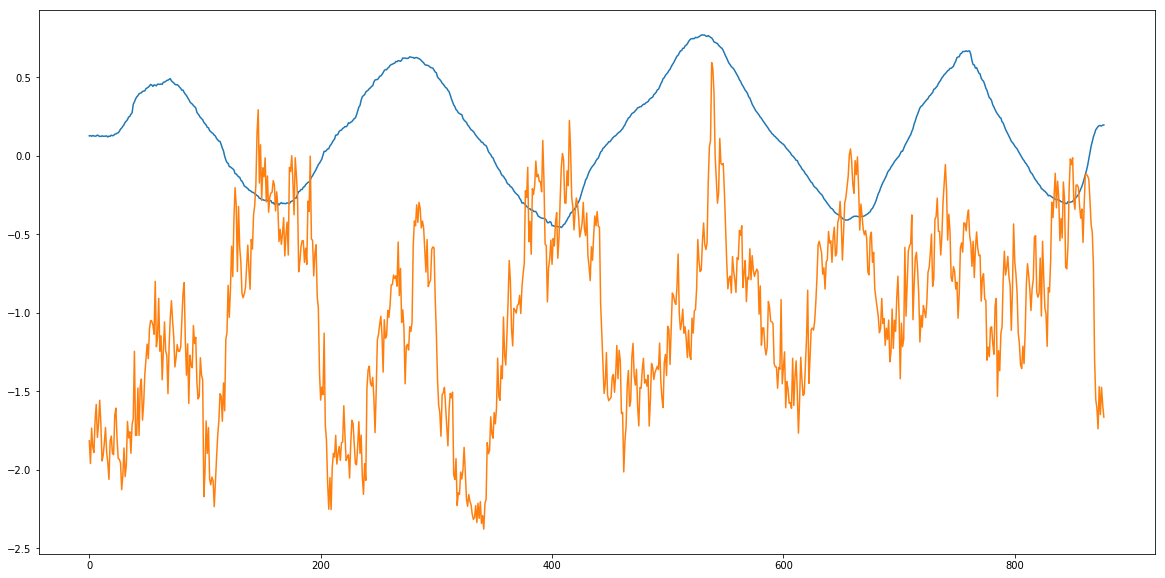

In [59]:
plt.plot(output1)